In [ ]:
###Day 3 – License Plate Recognition using YOLOv5
Custom object detection on license plate dataset using YOLOv5 and Colab (CPU).
Submitted by: N Srikanth"""

!pip install -r requirements.txt

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install required packages
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17521, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17521 (delta 14), reused 12 (delta 10), pack-reused 17491 (from 3)
Receiving objects: 100% (17521/17521), 16.60 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (12002/12002), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s e

In [ ]:
#### Step 1: Setup YOLOv5
We begin by cloning the official YOLOv5 GitHub repository and installing required dependencies to set up the object detection framework.

### Step 2: Navigate to Root and Unzip Dataset
We move one level up from the `yolov5` folder and unzip the dataset into a new directory called `dataset/`.

In [ ]:
yaml_text = """
train: dataset/license_plate_dataset/images/train
val: dataset/license_plate_dataset/images/val

nc: 1
names: ['license_plate']
"""

with open('data.yaml', 'w') as f:
    f.write(yaml_text)

### Step 3: Create data.yaml
The `data.yaml` file tells YOLOv5 where the training and validation images are located, how many classes exist (1 in this case), and the class name (`license_plate`).

In [ ]:
!ls /content/dataset/license_plate_dataset/images/train | head

100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg


In [ ]:
!ls /content/dataset/license_plate_dataset/labels/train | head

100.txt
101.txt
102.txt
103.txt
104.txt
105.txt
106.txt
107.txt
108.txt
109.txt


In [ ]:
yaml_text = """
train: /content/dataset/license_plate_dataset/images/train
val: /content/dataset/license_plate_dataset/images/val

nc: 1
names: ['license_plate']
"""

with open('/content/data.yaml', 'w') as f:
    f.write(yaml_text)

In [ ]:
!unzip /content/license_plate_dataset2.zip -d /content/dataset

Archive:  /content/license_plate_dataset2.zip
   creating: /content/dataset/license_plate_dataset/
  inflating: /content/dataset/license_plate_dataset/data.yaml  
   creating: /content/dataset/license_plate_dataset/images/
   creating: /content/dataset/license_plate_dataset/images/train/
  inflating: /content/dataset/license_plate_dataset/images/train/1.jpg  
  inflating: /content/dataset/license_plate_dataset/images/train/10.jpg  
  inflating: /content/dataset/license_plate_dataset/images/train/100.jpg  
  inflating: /content/dataset/license_plate_dataset/images/train/101.jpg  
  inflating: /content/dataset/license_plate_dataset/images/train/102.jpg  
  inflating: /content/dataset/license_plate_dataset/images/train/103.jpg  
  inflating: /content/dataset/license_plate_dataset/images/train/104.jpg  
  inflating: /content/dataset/license_plate_dataset/images/train/105.jpg  
  inflating: /content/dataset/license_plate_dataset/images/train/106.jpg  
  inflating: /content/dataset/license_p

In [ ]:
!ls -l /content/yolov5/license_plate_dataset/images/train | head

total 97024
-rw-rw-rw- 1 root root 161195 Jul  2 05:13 100.jpg
-rw-rw-rw- 1 root root 152787 Jul  2 05:13 101.jpg
-rw-rw-rw- 1 root root  59277 Jul  2 05:13 102.jpg
-rw-rw-rw- 1 root root 163347 Jul  2 05:13 103.jpg
-rw-rw-rw- 1 root root 175553 Jul  2 05:13 104.jpg
-rw-rw-rw- 1 root root 101401 Jul  2 05:13 105.jpg
-rw-rw-rw- 1 root root  63050 Jul  2 05:13 106.jpg
-rw-rw-rw- 1 root root 109859 Jul  2 05:13 107.jpg
-rw-rw-rw- 1 root root 126630 Jul  2 05:13 108.jpg


In [ ]:
from pathlib import Path
import yaml

data_path = Path('/content/yolov5/data.yaml')  # Full path to your YAML
assert data_path.exists(), "❌ data.yaml file not found!"

with open(data_path, errors='ignore') as f:
    data = yaml.safe_load(f)

print("✅ YAML loaded successfully.")
print("Train path:", data['train'])
print("Val path:", data['val'])

# Check if train/val folders actually exist
print("Train folder exists:", Path(data['train']).exists())
print("Val folder exists:", Path(data['val']).exists())

✅ YAML loaded successfully.
Train path: /content/yolov5/license_plate_dataset/images/train
Val path: /content/yolov5/license_plate_dataset/images/val
Train folder exists: True
Val folder exists: False


In [ ]:
with open('/content/yolov5/data.yaml', 'w') as f:
    f.write(
        "train: /content/yolov5/license_plate_dataset/images/train\n"
        "val: /content/yolov5/license_plate_dataset/images/train\n"
        "nc: 1\n"
        "names: [license_plate]\n"
    )

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --batch 16 --epochs 2 --data /content/yolov5/data.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-04 06:50:28.201443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751611828.239991   31413 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751611828.251756   31413 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data.yaml, hyp=data/hyps

In [ ]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17511/17511), 16.62 MiB | 18.12 MiB/s, done.
Resolving deltas: 100% (12000/12000), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import os

os.makedirs("/content/dataset/license_plate_dataset", exist_ok=True)

In [ ]:
yaml_text = """
train: /content/dataset/license_plate_dataset/images/train
val: /content/dataset/license_plate_dataset/images/val

nc: 1
names: ['license_plate']
"""

with open('/content/dataset/license_plate_dataset/data.yaml', 'w') as f:
    f.write(yaml_text)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving license_plate_dataset.zip to license_plate_dataset.zip


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving license_plate_dataset.zip to license_plate_dataset.zip


In [ ]:
import zipfile

# This is the uploaded file path
zip_path = "/content/license_plate_dataset.zip"

# This is where we want to unzip the files
extract_path = "/content/dataset/"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction completed.")

✅ Extraction completed.


In [ ]:
!ls /content/dataset/license_plate_dataset/images/train | head

100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg


In [ ]:
!ls /content/dataset/license_plate_dataset/labels/train | head

100.txt
101.txt
102.txt
103.txt
104.txt
105.txt
106.txt
107.txt
108.txt
109.txt


In [ ]:
yaml_text = """
train: /content/dataset/license_plate_dataset/images/train
val: /content/dataset/license_plate_dataset/images/val

nc: 1
names: ['license_plate']
"""

with open('/content/dataset/license_plate_dataset/data.yaml', 'w') as f:
    f.write(yaml_text)

print("✅ data.yaml file created successfully.")

✅ data.yaml file created successfully.


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17511/17511), 16.65 MiB | 24.79 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 878.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!ls /content/dataset/license_plate_dataset/images/train | head
!ls /content/dataset/license_plate_dataset/images/val | head

100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
ls: cannot access '/content/dataset/license_plate_dataset/images/val': No such file or directory


In [ ]:
yaml_text = """
train: /content/dataset/license_plate_dataset/images/train
val: /content/dataset/license_plate_dataset/images/train

nc: 1
names: ['license_plate']
"""

with open('/content/dataset/license_plate_dataset/data.yaml', 'w') as f:
    f.write(yaml_text)

print("✅ Fixed: data.yaml updated with same train and val folders.")

✅ Fixed: data.yaml updated with same train and val folders.


In [ ]:
yaml_text = """
train: /content/dataset/license_plate_dataset/images/train
val: /content/dataset/license_plate_dataset/images/train

nc: 1
names: ['license_plate']
"""

with open('/content/dataset/license_plate_dataset/data.yaml', 'w') as f:
    f.write(yaml_text)

print("✅ Fixed: data.yaml updated with same train and val folders.")

✅ Fixed: data.yaml updated with same train and val folders.


In [ ]:
%cd /content/yolov5

!python train.py \
  --img 416 \
  --batch 4 \
  --epochs 2 \
  --data /content/dataset/license_plate_dataset/data.yaml \
  --weights yolov5s.pt \
  --name lpr_model_cpu

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-04 13:24:45.984563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751635486.026946    7258 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751635486.040028    7258 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/content/dataset/license

In [ ]:
!python detect.py \
  --weights runs/train/lpr_model_cpu2/weights/best.pt \
  --img 416 \
  --conf 0.4 \
  --source /content/dataset/license_plate_dataset/images/train

detect: weights=['runs/train/lpr_model_cpu2/weights/best.pt'], source=/content/dataset/license_plate_dataset/images/train, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/900 /content/dataset/license_plate_dataset/images/train/1.jpg: 256x416 (no detections), 142.0ms
image 2/900 /content/dataset/license_plate_dataset/images/train/10.jpg: 320x416 (no detections), 168.0ms
image 3/900 /content/dataset/license_plate_dataset/images/train/100.jpg: 320x416 1 lice

In [ ]:
!mkdir /content/sample_predictions
!cp runs/detect/exp/*.jpg /content/sample_predictions/

In [ ]:
!ls /content/sample_predictions | head

100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg


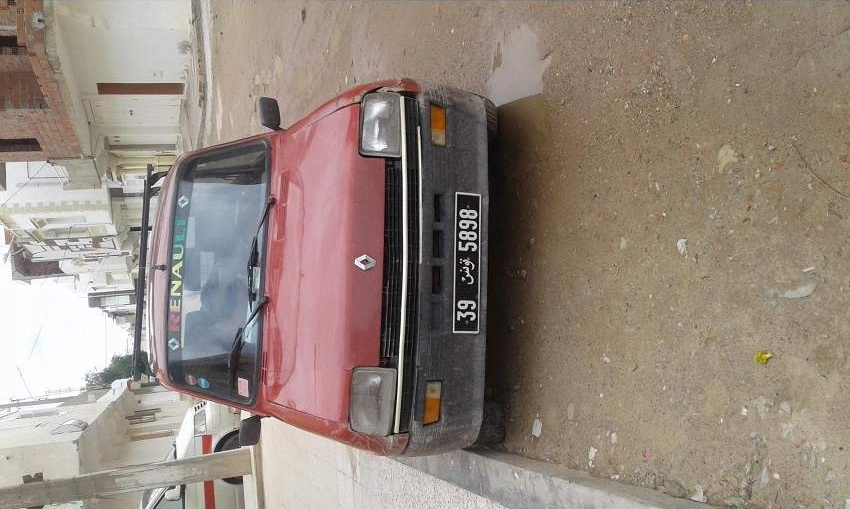

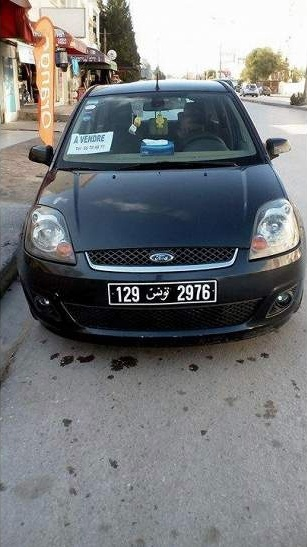

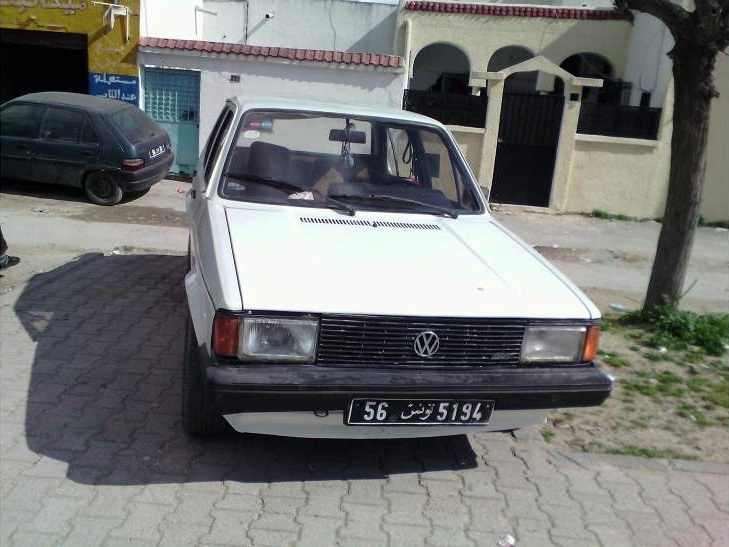

In [ ]:
from IPython.display import Image, display
import os

pred_dir = "/content/sample_predictions"
sample_images = os.listdir(pred_dir)[:3]

for img_name in sample_images:
    display(Image(filename=os.path.join(pred_dir, img_name)))

In [ ]:
!zip -r Day3_LPR_Submission.zip yolov5 dataset sample_predictions README.md

	zip warning: name not matched: yolov5
	zip warning: name not matched: dataset
	zip warning: name not matched: sample_predictions
  adding: README.md (deflated 78%)


In [ ]:
!ls /content

dataset  license_plate_dataset.zip  sample_data  sample_predictions  yolov5


In [ ]:
!zip -r Day3_LPR_Submission.zip yolov5 dataset sample_predictions README.md

	zip warning: name not matched: yolov5
	zip warning: name not matched: dataset
	zip warning: name not matched: sample_predictions
updating: README.md (deflated 78%)


In [ ]:
!zip -r /content/Day3_LPR_Submission.zip /content/yolov5 /content/dataset /content/sample_predictions /content/README.md

	zip warning: name not matched: /content/README.md
  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/Day3_LPR_Submission.zip (stored 0%)
  adding: content/yolov5/.dockerignore (deflated 56%)
  adding: content/yolov5/pyproject.toml (deflated 59%)
  adding: content/yolov5/.github/ (stored 0%)
  adding: content/yolov5/.github/dependabot.yml (deflated 54%)
  adding: content/yolov5/.github/workflows/ (stored 0%)
  adding: content/yolov5/.github/workflows/cla.yml (deflated 55%)
  adding: content/yolov5/.github/workflows/docker.yml (deflated 67%)
  adding: content/yolov5/.github/workflows/format.yml (deflated 62%)
  adding: content/yolov5/.github/workflows/merge-main-into-prs.yml (deflated 66%)
  adding: content/yolov5/.github/workflows/links.yml (deflated 65%)
  adding: content/yolov5/.github/workflows/ci-testing.yml (deflated 71%)
  adding: content/yolov5/.github/workflows/stale.yml (deflated 58%)
  adding: content/yolov5/.github/ISSUE_TEMPLATE/ (stored 0%)
  adding: content/yo

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17511/17511), 16.62 MiB | 18.74 MiB/s, done.
Resolving deltas: 100% (12000/12000), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!zip -r yolov5.zip yolov5

	zip warning: name not matched: yolov5

zip error: Nothing to do! (try: zip -r yolov5.zip . -i yolov5)


In [ ]:
%cd /content


/content


In [ ]:
!zip -r yolov5.zip yolov5

  adding: yolov5/ (stored 0%)
  adding: yolov5/.dockerignore (deflated 56%)
  adding: yolov5/pyproject.toml (deflated 59%)
  adding: yolov5/.github/ (stored 0%)
  adding: yolov5/.github/dependabot.yml (deflated 54%)
  adding: yolov5/.github/workflows/ (stored 0%)
  adding: yolov5/.github/workflows/cla.yml (deflated 55%)
  adding: yolov5/.github/workflows/docker.yml (deflated 67%)
  adding: yolov5/.github/workflows/format.yml (deflated 62%)
  adding: yolov5/.github/workflows/merge-main-into-prs.yml (deflated 66%)
  adding: yolov5/.github/workflows/links.yml (deflated 65%)
  adding: yolov5/.github/workflows/ci-testing.yml (deflated 71%)
  adding: yolov5/.github/workflows/stale.yml (deflated 58%)
  adding: yolov5/.github/ISSUE_TEMPLATE/ (stored 0%)
  adding: yolov5/.github/ISSUE_TEMPLATE/config.yml (deflated 49%)
  adding: yolov5/.github/ISSUE_TEMPLATE/question.yml (deflated 56%)
  adding: yolov5/.github/ISSUE_TEMPLATE/bug-report.yml (deflated 60%)
  adding: yolov5/.github/ISSUE_TEMPLATE/